# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Cardano, and Tron Daily Price Analyses – 7 July Roundup.  The performance of the global crypto market has shown bullishness as the influx of capital continues. The positive changes for Bitcoin, Ethereum, and others have continued unaffected, strengthening the market. As the influx has continued unimpeded, there has been an enhancement in the global market cap value. The bullish wave came after a bearish current... ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-cardano-and-tron-daily-price-analyses-7-july-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- B.C. enters third Omicron wave as COVID hospitalizations jump 35% over last week | CBC News.  A day after Ontario announced its third wave, Adrian Dix said cases in British Columbia are also trending upwards, though not as significantly as hospitalizations. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/british-columbia/bc-third-omicron-wave-july-7-1.6514145) 

### Kainų kaita pandemijos metu

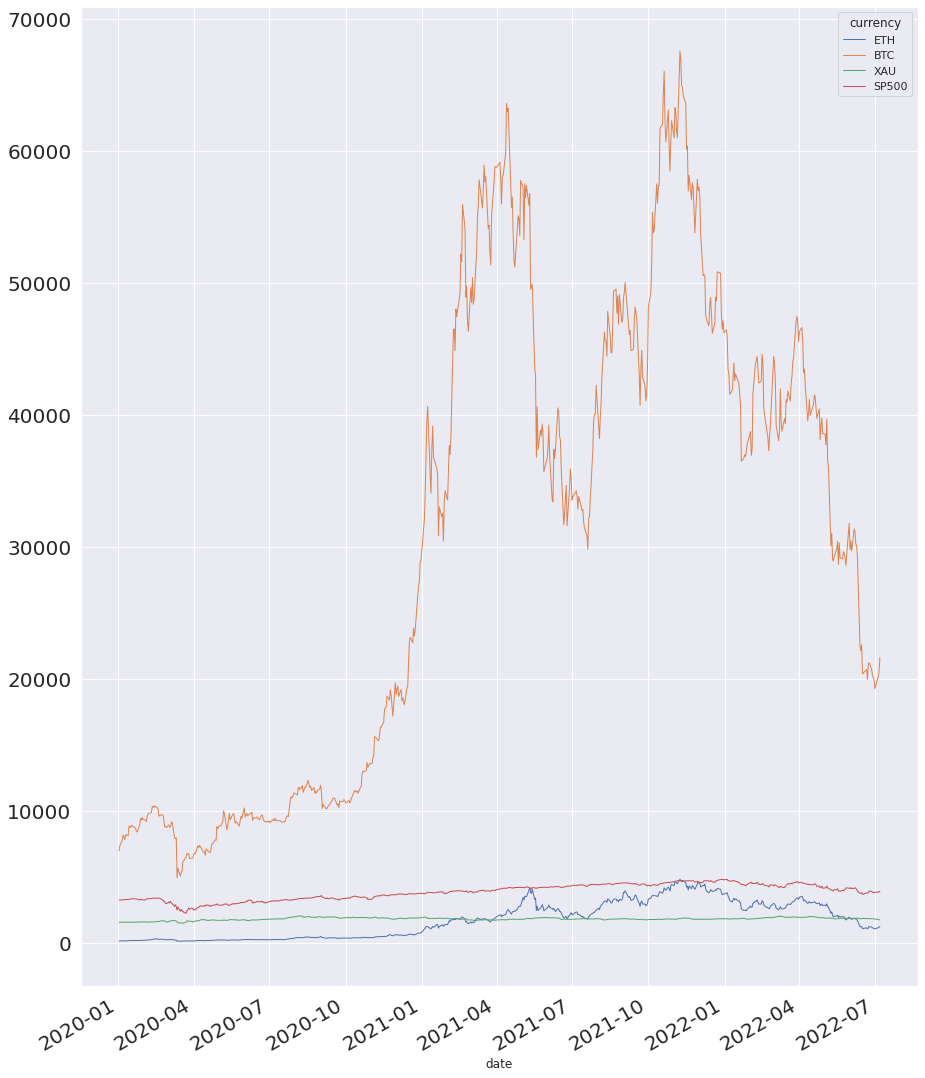

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903320,0.246223,0.921503
BTC,0.903320,1.000000,0.193762,0.868148
XAU,0.246223,0.193762,1.000000,0.377731
SP500,0.921503,0.868148,0.377731,1.000000


In [8]:
#hide ### Koreliacijos matrica.

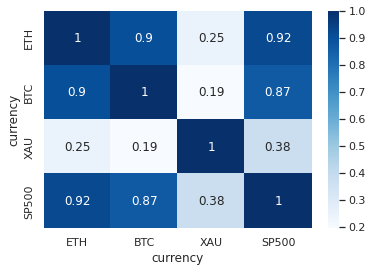

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')